## Installation of Python Packages

In [30]:
!python3 -m pip install scikit-learn

In [31]:
pip install tensorflow_data_validation


In [32]:
pip install utils

In [34]:
import tensorflow as tf
import tensorflow_data_validation as tfdv
import pandas as pd

from sklearn.model_selection import train_test_split
#from utils import add_extra_rows

from tensorflow_metadata.proto.v0 import schema_pb2

print('TFDV Version: {}'.format(tfdv.__version__))
print('Tensorflow Version: {}'.format(tf.__version__))

TFDV Version: 1.14.0
Tensorflow Version: 2.15.0


In [ ]:
#mounting Google drive to Colab
#from google.colab import drive
#drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [35]:
# Naming the dataframe as aml ( for anti money Laundering)
import pandas as pd
aml = pd.read_csv("HI-Small_Trans.csv")

## Exploration of the Data

In [36]:
aml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5078345 entries, 0 to 5078344
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Timestamp           object 
 1   From Bank           int64  
 2   Account             object 
 3   To Bank             int64  
 4   Account.1           object 
 5   Amount Received     float64
 6   Receiving Currency  object 
 7   Amount Paid         float64
 8   Payment Currency    object 
 9   Payment Format      object 
 10  Is Laundering       int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 426.2+ MB


In [37]:
#converting "TimeStamp" column to datetime format
aml['Timestamp'] = pd.to_datetime(aml['Timestamp'])


In [38]:
aml.head()

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022-09-01 00:20:00,10,8000EBD30,10,8000EBD30,3697.34,US Dollar,3697.34,US Dollar,Reinvestment,0
1,2022-09-01 00:20:00,3208,8000F4580,1,8000F5340,0.01,US Dollar,0.01,US Dollar,Cheque,0
2,2022-09-01 00:00:00,3209,8000F4670,3209,8000F4670,14675.57,US Dollar,14675.57,US Dollar,Reinvestment,0
3,2022-09-01 00:02:00,12,8000F5030,12,8000F5030,2806.97,US Dollar,2806.97,US Dollar,Reinvestment,0
4,2022-09-01 00:06:00,10,8000F5200,10,8000F5200,36682.97,US Dollar,36682.97,US Dollar,Reinvestment,0


In [41]:
aml.describe(include='all')

<ipython-input-41-a79bde483c6f>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  aml.describe(include='all')


,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
count,5078345,5.078345e+06,5078345,5.078345e+06,5078345,5.078345e+06,5078345,5.078345e+06,5078345,5078345,5.078345e+06
unique,15018,NaN,496995,NaN,420636,NaN,15,NaN,15,7,NaN
top,2022-09-01 00:04:00,NaN,100428660,NaN,100428660,NaN,US Dollar,NaN,US Dollar,Cheque,NaN
freq,11193,NaN,168672,NaN,1084,NaN,1879341,NaN,1895172,1864331,NaN
first,2022-09-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2022-09-18 16:18:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.573057e+04,NaN,6.574456e+04,NaN,5.988726e+06,NaN,4.509273e+06,NaN,NaN,1.019427e-03
std,NaN,8.176562e+04,NaN,8.409299e+04,NaN,1.037183e+09,NaN,8.697728e+08,NaN,NaN,3.191219e-02
min,NaN,1.000000e+00,NaN,1.000000e+00,NaN,1.000000e-06,NaN,1.000000e-06,NaN,NaN,0.000000e+00
25%,NaN,1.190000e+02,NaN,4.259000e+03,NaN,1.833700e+02,NaN,1.844800e+02,NaN,NaN,0.000000e+00


## Using Tensorflow Data Validation

In [42]:
#using TFDV to read the file
aml_stats = tfdv.generate_statistics_from_dataframe(aml)

In [43]:
# Visualize training dataset statistics
tfdv.visualize_statistics(aml_stats)

In [44]:
# Infer schema from the computed statistics.
schema = tfdv.infer_schema(statistics=aml_stats)

# Display the inferred schema
tfdv.display_schema(schema)

,Type,Presence,Valency,Domain
Feature name,,,,
'From Bank',INT,required,,-
'Account',BYTES,required,,-
'To Bank',INT,required,,-
'Account.1',BYTES,required,,-
'Amount Received',FLOAT,required,,-
'Receiving Currency',STRING,required,,'Receiving Currency'
'Amount Paid',FLOAT,required,,-
'Payment Currency',STRING,required,,'Payment Currency'
'Payment Format',STRING,required,,'Payment Format'


,Values
Domain,
'Receiving Currency',"'Australian Dollar', 'Bitcoin', 'Brazil Real', 'Canadian Dollar', 'Euro', 'Mexican Peso', 'Ruble', 'Rupee', 'Saudi Riyal', 'Shekel', 'Swiss Franc', 'UK Pound', 'US Dollar', 'Yen', 'Yuan'"
'Payment Currency',"'Australian Dollar', 'Bitcoin', 'Brazil Real', 'Canadian Dollar', 'Euro', 'Mexican Peso', 'Ruble', 'Rupee', 'Saudi Riyal', 'Shekel', 'Swiss Franc', 'UK Pound', 'US Dollar', 'Yen', 'Yuan'"
'Payment Format',"'ACH', 'Bitcoin', 'Cash', 'Cheque', 'Credit Card', 'Reinvestment', 'Wire'"


In [45]:
payment = aml[['Payment Currency','Receiving Currency']]

In [46]:
stats_payment = tfdv.generate_statistics_from_dataframe(payment)
tfdv.visualize_statistics(stats_payment)



### Filtering Dataframe where 'is laundering' equals 1

In [47]:
laundering_aml = aml[aml['Is Laundering'] == 1]
nlaundering_aml = aml[aml['Is Laundering'] == 0]

In [48]:
laundering_amlS = tfdv.generate_statistics_from_dataframe(laundering_aml)
nlaundering_amlS = tfdv.generate_statistics_from_dataframe(nlaundering_aml)



In [49]:

tfdv.visualize_statistics(
    lhs_statistics=laundering_amlS,
    rhs_statistics=nlaundering_amlS,
    lhs_name='Laundered Money',
    rhs_name='Money'
)


Above TFDV Statistics shows one of the many important information - the bar chart for the different types of Payment types and How many times they were used.

## EDA using Python

In [50]:
print("Number of unique from banks: ", aml['From Bank'].nunique())
print("Number of unique to banks: ", aml['To Bank'].nunique())

Number of unique from banks:  30470
Number of unique to banks:  15811


In [51]:
print("Number of unique from accounts: ", aml['Account'].nunique())
print("Number of unique to accounts: ", aml['Account.1'].nunique())

Number of unique from accounts:  496995
Number of unique to accounts:  420636


In [52]:
print("Payment Currency value counts: \n", laundering_aml['Payment Currency'].value_counts())
print("Receiving Currency value counts: \n", laundering_aml['Receiving Currency'].value_counts())

Payment Currency value counts: 
 US Dollar            1912
Euro                 1372
Saudi Riyal           374
Swiss Franc           193
Yuan                  184
Rupee                 167
Yen                   155
Ruble                 133
UK Pound              132
Canadian Dollar       128
Australian Dollar     127
Shekel                 95
Mexican Peso           92
Brazil Real            57
Bitcoin                56
Name: Payment Currency, dtype: int64
Receiving Currency value counts: 
 US Dollar            1912
Euro                 1372
Saudi Riyal           374
Swiss Franc           193
Yuan                  184
Rupee                 167
Yen                   155
Ruble                 133
UK Pound              132
Canadian Dollar       128
Australian Dollar     127
Shekel                 95
Mexican Peso           92
Brazil Real            57
Bitcoin                56
Name: Receiving Currency, dtype: int64


In [54]:
print("Payment Currency value counts: \n", nlaundering_aml['Payment Currency'].value_counts())
print("Receiving Currency value counts: \n", nlaundering_aml['Receiving Currency'].value_counts())

Payment Currency value counts: 
 US Dollar            1893260
Euro                 1166925
Swiss Franc           234667
Yuan                  213568
Shekel                192089
Rupee                 190035
UK Pound              180606
Yen                   155054
Ruble                 155045
Bitcoin               146010
Canadian Dollar       139914
Australian Dollar     136642
Mexican Peso          110067
Saudi Riyal            88640
Brazil Real            70646
Name: Payment Currency, dtype: int64
Receiving Currency value counts: 
 US Dollar            1877429
Euro                 1170645
Swiss Franc           237691
Yuan                  206367
Shekel                194893
Rupee                 191898
UK Pound              181123
Ruble                 157228
Yen                   156164
Bitcoin               148095
Canadian Dollar       141229
Australian Dollar     138384
Mexican Peso          110938
Saudi Riyal            89597
Brazil Real            71487
Name: Receiving Currency,

In [55]:
print("Amount Paid min in laundering transactions: ", nlaundering_aml['Amount Paid'].min())
print("Amount Paid max in laundering transactions: ", nlaundering_aml['Amount Paid'].max())
print("Amount Paid mean in laundering transactions: ", nlaundering_aml['Amount Paid'].mean())
print("Amount Paid median in laundering transactions: ", nlaundering_aml['Amount Paid'].median())

Amount Paid min in laundering transactions:  1e-06
Amount Paid max in laundering transactions:  1046302363293.48
Amount Paid mean in laundering transactions:  4477000.043896748
Amount Paid median in laundering transactions:  1410.99


In [57]:
print("Amount Paid min in laundering transactions: ", laundering_aml['Amount Paid'].min())
print("Amount Paid max in laundering transactions: ", laundering_aml['Amount Paid'].max())
print("Amount Paid mean in laundering transactions: ", laundering_aml['Amount Paid'].mean())
print("Amount Paid median in laundering transactions: ", laundering_aml['Amount Paid'].median())

Amount Paid min in laundering transactions:  0.003227
Amount Paid max in laundering transactions:  84853144179.58
Amount Paid mean in laundering transactions:  36135310.41281265
Amount Paid median in laundering transactions:  8667.21


In [58]:
print("Amount Received min in laundering transactions: ", laundering_aml['Amount Received'].min())
print("Amount Received max in laundering transactions: ", laundering_aml['Amount Received'].max())
print("Amount Received mean in laundering transactions: ", laundering_aml['Amount Received'].mean())
print("Amount Received median in laundering transactions: ", laundering_aml['Amount Received'].median())


Amount Received min in laundering transactions:  0.003227
Amount Received max in laundering transactions:  84853144179.58
Amount Received mean in laundering transactions:  36135310.41281265
Amount Received median in laundering transactions:  8667.21


In [59]:
print("Amount Received min in laundering transactions: ", nlaundering_aml['Amount Received'].min())
print("Amount Received max in laundering transactions: ", nlaundering_aml['Amount Received'].max())
print("Amount Received mean in laundering transactions: ", nlaundering_aml['Amount Received'].mean())
print("Amount Received median in laundering transactions: ", nlaundering_aml['Amount Received'].median())


Amount Received min in laundering transactions:  1e-06
Amount Received max in laundering transactions:  1046302363293.48
Amount Received mean in laundering transactions:  5957962.478734538
Amount Received median in laundering transactions:  1407.51


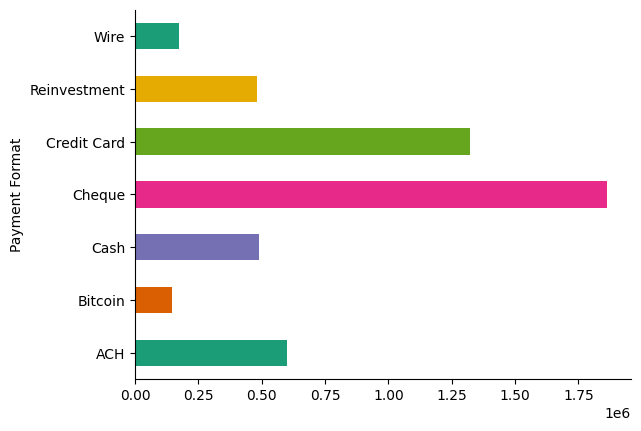

In [60]:
from matplotlib import pyplot as plt
import seaborn as sns
aml.groupby('Payment Format').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)